<a href="https://colab.research.google.com/github/moulaali/ml/blob/master/handdigit_classify_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Load mnist data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# 60k training
train_images.shape

(60000, 28, 28)

In [20]:
# simple single layer architecture with 10 labels with softmax
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
# optimizer : optimizes the iteration
# loss function : measures the delta
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
# convert to 1d data with normalization of 0-1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2632 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1070 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0705 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0386 - accuracy: 0.9890


In [24]:
# try with test digit
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[2].argmax()

1/1 [==============================] - 0s 50ms/step


1

In [25]:
test_labels[2]

1

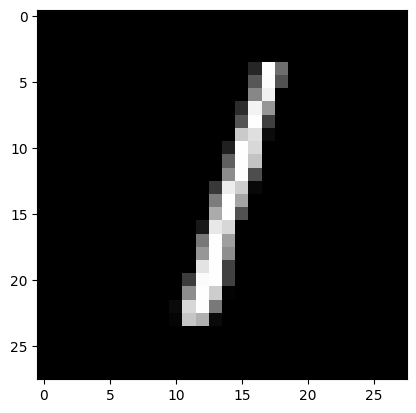

In [26]:
# display it
from matplotlib import pyplot as plt
import numpy as np

first_image = np.array(test_images[2], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()